In [149]:
import matplotlib.pyplot as plt
import firedrake
import pickle
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [29]:
# Read in the inverted `A` field. See Ian's email for the names of the other
# fields (`betaInv`, etc).
base_path = '/home/firedrake/H3F/roughness'
filename = base_path + '/pig_inverse.h5'
with firedrake.CheckpointFile(filename, "r") as chk:
    mesh = chk.load_mesh()
    A_inv = chk.load_function(mesh, name="AInv")

In [30]:
with open(base_path + '/pig_data', 'rb') as handle:
    pig_roughness = pickle.load(handle)

In [121]:
E = pig_roughness['E_out'].values
N = pig_roughness['N_out'].values
R = pig_roughness['R'].values

import tqdm

df = pd.DataFrame(columns = ['E', 'N', 'R', 'A_inv'], index = [])
for i in tqdm.trange(len(R)):
    e = E[i]
    n = N[i]
    r = R[i]
    a = []
    
    for j in range(len(r)):
        x = e[j]
        y = n[j]
        try:
            data = A_inv.at((x, y), tolerance = 1e-10)
        except:
            data = np.nan
        a.append(data)
    dictionary = {"E":e,"N":n,"R":r, "A_inv":a}
    dictionary = pd.DataFrame([dictionary])
    df = pd.concat([df, dictionary], ignore_index = True)

100%|█████████████████████████████████████████████████████████████████████████████████| 847/847 [02:18<00:00,  6.13it/s]


In [123]:
R = df['R'].values
A_inv = df['A_inv'].values
E = df['E'].values
N = df['N'].values

Text(0, 0.5, 'roughness')

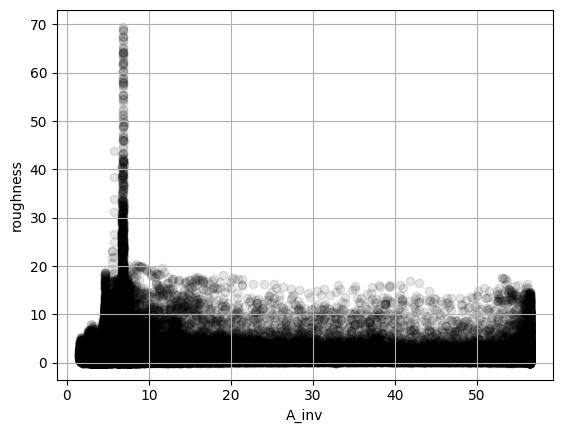

In [137]:
plt.figure()
for i in range(len(R)):
    plt.scatter(A_inv[i], R[i], color = 'k', alpha = 0.1, s = 1)
plt.grid()
plt.xlabel('A_inv')
plt.ylabel('roughness')

Text(0, 0.5, 'northing')

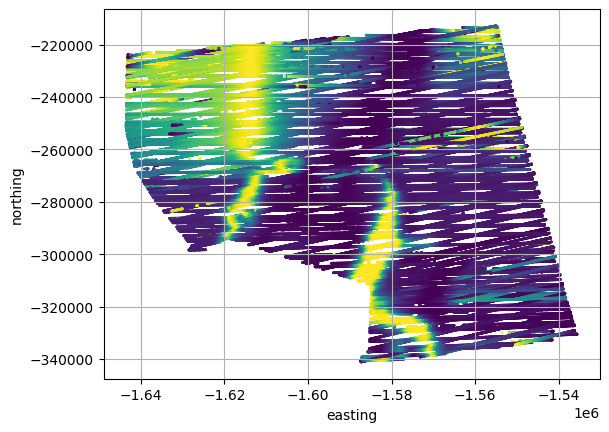

In [146]:
plt.figure()
for i in range(len(A_inv)):
    plt.scatter(E[i], N[i], c = A_inv[i], s = 1)
plt.grid()
plt.xlabel('easting')
plt.ylabel('northing')
    

Text(0, 0.5, 'northing')

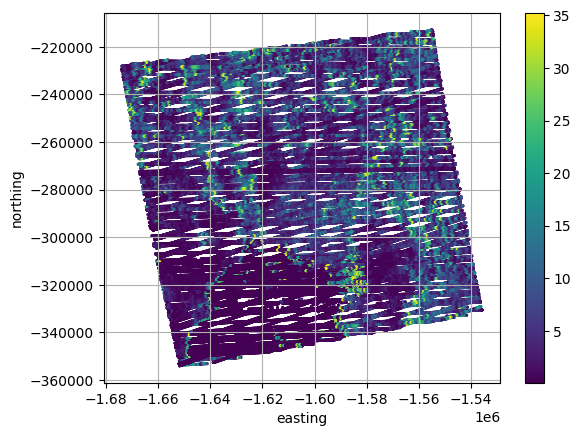

In [148]:
plt.figure()
for i in range(len(A_inv)):
    plt.scatter(E[i], N[i], c = R[i], s = 1)
plt.grid()
plt.colorbar()
plt.xlabel('easting')
plt.ylabel('northing')

In [151]:
study_shelf_id = 590802
all_shelf_outline_path = base_path + '/pig.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
shape = all_shelf_outline[all_shelf_outline['OBJECTID']==study_shelf_id]

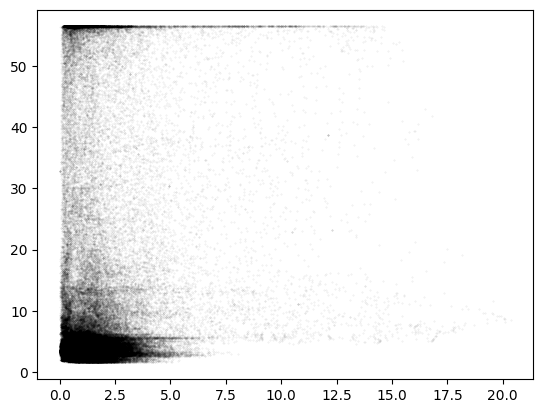

In [157]:
fig, ax = plt.subplots()
for j in range(np.shape(df)[0]):
    x = np.array(df['E'].iloc[j])
    y = np.array(df['N'].iloc[j])
    r = np.array(df['R'].iloc[j])
    a = np.array(df['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(df['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    points = ax.scatter(r, a, c='k', s=0.1, alpha = 0.1)

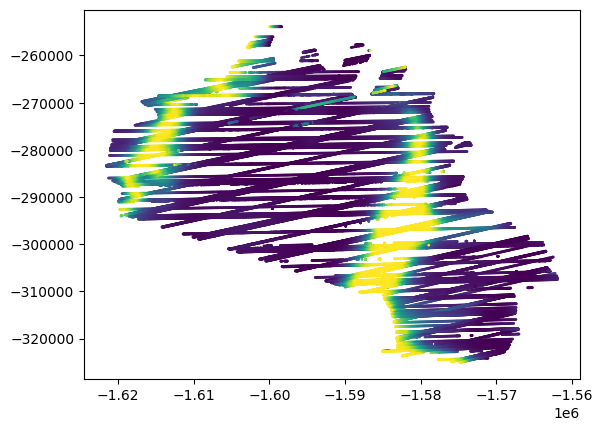

In [158]:
fig, ax = plt.subplots()
for j in range(np.shape(df)[0]):
    x = np.array(df['E'].iloc[j])
    y = np.array(df['N'].iloc[j])
    r = np.array(df['R'].iloc[j])
    a = np.array(df['A_inv'].iloc[j])
    on_shelf = []
    for k in range(len(df['E'].iloc[j])):
        pts_on_shelf = shape.contains(Point(x[k],y[k]))
        on_shelf.append(pts_on_shelf.values[0])
    on_shelf = np.array(on_shelf)
    x = x[on_shelf==True]
    y = y[on_shelf==True]
    r = r[on_shelf==True]
    a = a[on_shelf == True]
    points = ax.scatter(x, y, c=a, s=1)